In [11]:
import urllib.request         # for linking URL
import json                   # for JSON data
import re                     # for using regular expression

# Extracting Data from the given API

API_Key="9880c74065764563b878fdc36ed607a3" # Use Your personal Key by registering yourself on API 
Search_Topic="Project+Control"#write your desired Topic if topic have spaces then use '+' for space e.g Auto+mobile+inductry

In [12]:
def data_extraction(key,topic):#this function extracts data of Title, description and content of required topic  
   
    title=""
    description=""
    content=""
    response = urllib.request.urlopen('https://newsapi.org/v2/everything?q='+topic+'&pagesize=100&apiKey='+key).read()
    headline = json.loads(response)                # response of API in JSON
    for artical in headline["articles"]:
        title += str(artical["title"])             # for Storing data of title in a string from JSON response
        description += str(artical["description"]) # Store data of description in a string from JSON response
        content += str(artical["content"])         # for Storing data of content in a string from JSON response
    data_as_str=title+description+content          # for storing whole data in a string to return 
    return data_as_str

In [13]:
All_text=data_extraction(API_Key, Search_Topic)

In [14]:
def extract_words(sentence): # This function returns tokens as a clean text
    # if we need to remove specific words from data indlude in below list
    # letters_only = re.sub("[^a-zA-Z]", " ", review_text) # use this line if we want to ignore integeral data
    stop_words = ['i','me', 'chars', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    words = re.sub("[^\w]", " ",  sentence).lower().split() # Split the whole string into tokens 
    words_cleaned = [w.lower() for w in words if w not in stop_words] # remove the stop words
    return words_cleaned

In [15]:
extract_words(All_text)

['wrangle',
 'control',
 'life',
 'notion',
 'wikia',
 'genetic',
 'mutation',
 'might',
 'explain',
 'birth',
 'control',
 'failgoogle',
 'assistant',
 'gets',
 'expanded',
 'language',
 'device',
 'supportis',
 'amazon',
 'aws',
 'approaching',
 'war',
 'control',
 'elasticsearch',
 'truly',
 'random',
 'midi',
 'controlamazon',
 'launches',
 'new',
 'tools',
 'allow',
 'brands',
 'proactively',
 'fight',
 'counterfeitingamazon',
 'door',
 'still',
 'openwhy',
 'daimler',
 'moved',
 'big',
 'data',
 'platform',
 'cloudart',
 'deco',
 'control',
 'panel',
 'looks',
 'metropolisfix',
 'brother',
 'fs40',
 '40',
 'stitch',
 'electronic',
 'sewing',
 'machine',
 '130google',
 'managed',
 'hybrid',
 'cloud',
 'platform',
 'betacontrol',
 'robotic',
 'arm',
 'zio',
 'modules',
 'part',
 '1in',
 'mexican',
 'heartland',
 'bad',
 'guys',
 'still',
 'hold',
 'sway',
 'amid',
 'bid',
 'restore',
 'orderminiature',
 '3d',
 'printed',
 'forklift',
 'quite',
 'pallet',
 'ablearenanet',
 'confirms

In [16]:
def bagofwords(words):  # This function returns a dictonary of tokens with its frequency

    # frequency word count
    bag = {}
    for sw in words:
        if sw in bag:
            bag[sw]+=1
        else:
            bag[sw]=1
    return bag

In [17]:
vocabulary=extract_words(All_text) # storing whole vocabulary data 
# print(vocabulary)
bag_dict=bagofwords(vocabulary)    # bag of data of required vocabulary

print("Length of Bag_of_words:"+str(len(bag_dict)))
bag_dict = {key:val for key, val in bag_dict.items() if val != 1} # This removes data with frequency 1(not recommended)
print("Length of Bag_of_words after removing low frequency data:"+str(len(bag_dict)))

Length of Bag_of_words:2537
Length of Bag_of_words after removing low frequency data:1318


In [18]:
bag_dict  # This prints tokenize data with frequency in dictionary data type

{'wrangle': 3,
 'control': 29,
 'life': 4,
 'notion': 3,
 'might': 6,
 'birth': 2,
 'assistant': 4,
 'gets': 3,
 'expanded': 3,
 'language': 3,
 'device': 4,
 'amazon': 13,
 'elasticsearch': 3,
 'truly': 3,
 'random': 11,
 'new': 31,
 'tools': 6,
 'allow': 3,
 'fight': 4,
 'door': 2,
 'still': 6,
 'daimler': 5,
 'moved': 3,
 'big': 10,
 'data': 12,
 'platform': 7,
 'panel': 2,
 'electronic': 2,
 'sewing': 7,
 'machine': 4,
 'managed': 3,
 'hybrid': 3,
 'cloud': 10,
 'robotic': 8,
 'arm': 12,
 'zio': 3,
 'modules': 3,
 'part': 10,
 'mexican': 3,
 'bad': 2,
 'amid': 2,
 'bid': 4,
 '3d': 7,
 'printed': 2,
 'forklift': 3,
 'quite': 4,
 'morning': 4,
 'say': 3,
 'samsung': 5,
 'galaxy': 2,
 'court': 3,
 'announces': 2,
 'canada': 5,
 'partner': 5,
 'nasa': 15,
 'led': 6,
 'lunar': 7,
 'gateway': 4,
 'project': 63,
 'canadianmanufacturing': 2,
 'remote': 10,
 'camera': 6,
 'slider': 3,
 'panning': 3,
 'prototype': 3,
 'helicopter': 4,
 'bihar': 4,
 'today': 13,
 'pm': 7,
 'launch': 12,
 'sch

In [19]:
# for Downloading & importing library for visualize data
# import sys
#!{sys.executable} -m pip install WordCloud
import matplotlib.pyplot as plt
# importing all necessery modules
from wordcloud import WordCloud

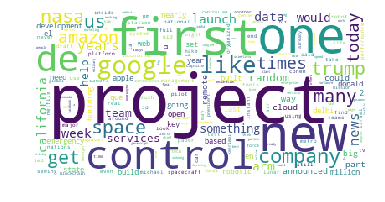

In [20]:
cloud = WordCloud(background_color="white").generate_from_frequencies(bag_dict) # include the bag of words in cloud
plt.imshow(cloud)
plt.axis('off') # turn off the Axis
plt.show() # Show the ploted Cloud
